# **1.Music Recommendation:

Music recommender systems can suggest songs to users based on their listening patterns.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/dataset.csv"
df=pd.read_csv(path)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#data cleaning
df.shape

(114000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

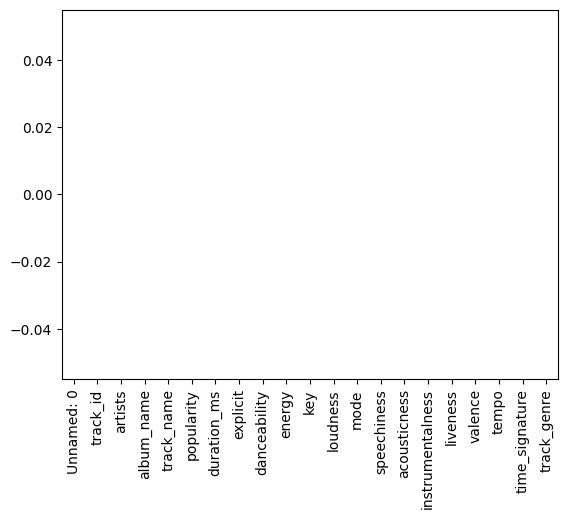

In [ ]:
df.dropna(inplace = True)
df.isnull().sum().plot.bar()
plt.show()

In [ ]:
df.drop('track_id',axis=1,inplace=True)
df.head()

,Unnamed: 0,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(df.head(500))
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

ValueError: ignored

In [ ]:
df['album_name'].nunique(), df.shape

(46589, (113999, 20))

In [ ]:
df = df.sort_values(by=['popularity'], ascending=False)
df.drop_duplicates(subset=['album_name'], keep='first', inplace=True)  #removing the duplicates

In [ ]:
df.isnull().sum()

Unnamed: 0          0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
floats = []
for col in df.columns:
  if df[col].dtype == 'float':
    floats.append(col)

len(floats) #There is a total of 9 such columns with float values in them.
#Let’s draw their distribution plot to get insights into the distribution of the data.

9

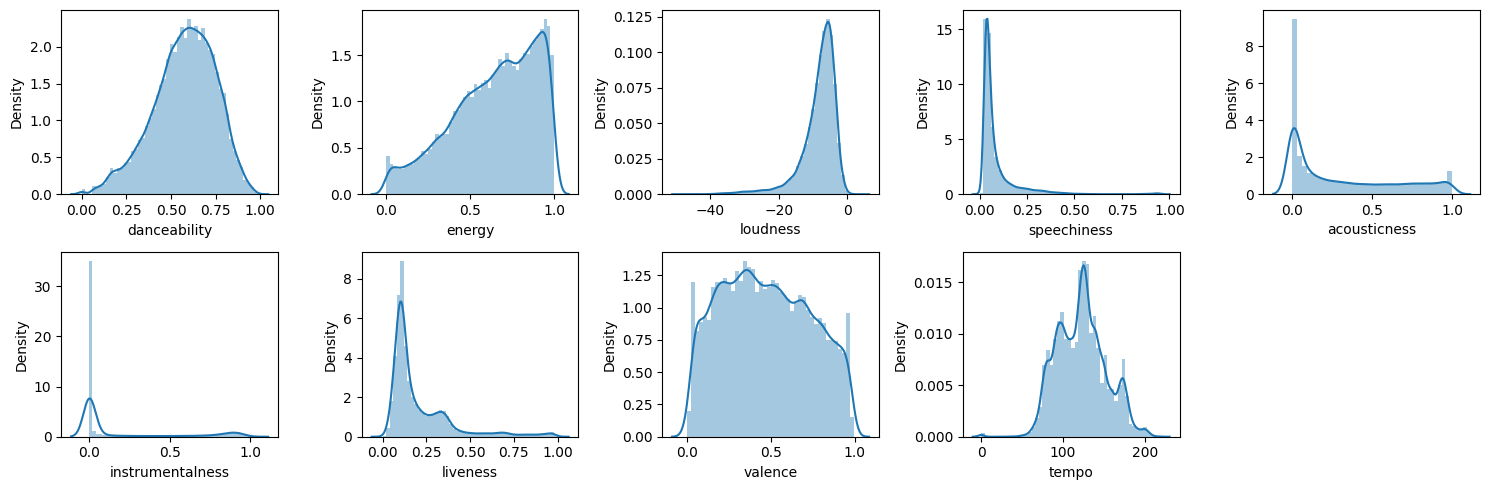

In [ ]:
plt.subplots(figsize = (15, 5))   #Some of the features have normal distribution while some data distribution is skewed as well
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [ ]:
#As the dataset is too large computation cost/time will to too high so,
# we will show the implementation of the recommended system by using the most popular 10,000 songs
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(df['track_genre'])

In [ ]:
df =df.sort_values(by=['popularity'], ascending=False).head(10000)
##As the dataset is too large computation cost/time will to too high so,
# we will show the implementation of the recommended system by using the most popular 10,000 songs


In [ ]:
def get_similarities(song_name, data):  #Below is a helper function to get similarities for the input song with each song in the dataset.

  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['album_name']==song_name]['track_genre']).toarray()
  num_array1 = data[data['album_name']==song_name].select_dtypes(include=np.number).to_numpy()

  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['album_name']

    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['album_name']==name]['track_genre']).toarray()
    num_array2 = data[data['album_name']==name].select_dtypes(include=np.number).to_numpy()

    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)

  return sim

In [ ]:
def recommend_songs(song_name, data=df): #To calculate the similarity between the two vectors we have used the concept of cosine similarity.


  # Base case
  if df[df['album_name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')

    for song in data.sample(n=5)['album_name'].values:
      print(song)
    return

  data['similarity_factor'] = get_similarities(song_name, data)

  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)

  # First song will be the input song itself as the similarity will be highest.
  display(data[['album_name', 'artists']][2:7])

In [ ]:
#Now, it’s time to see the recommender system at work.
# Let’s see which songs are recommender system will recommend if he/she listens to the famous song ‘Shape of you’.
recommend_songs('Shape of You')



This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

LoFi Songs
Kontrol
Somebody Loved
Rise Up (The Remixes)
Haru wo Tsugeru


In [ ]:

recommend_songs('Love Someone')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

As You Are
dear me,
認了吧
Pesetas
Listen


In [ ]:
recommend_songs('Love me like you do')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

Senin Yüzünden
Completely Well
Way Ahead
(III)
Blackout


In [ ]:
recommend_songs('Masoom')

,album_name,artists
80930,"Tharangini [From ""Cobra (Telugu)""]",A.R. Rahman;Sarthak Kalyani;Mira Sengupta
80880,Vijay Superum Pournamiyum (Original Motion Pic...,Vijay Yesudas;Shweta Mohan;Prince George
80045,Ponniyin Selvan Part-1 (Original Motion Pictur...,Sathyaprakash;VM Mahalingam;Nakul Abhyankar
80985,Kabali (Original Motion Picture Soundtrack),Santhosh Narayanan;Arunraja Kamaraj
80600,Bol (Original Motion Picture Soundtrack),Atif Aslam;Hadiqa Kiani


In [ ]:
recommend_songs('Señorita')

,album_name,artists
20064,Listen,David Guetta;Afrojack;Bebe Rexha;Nicki Minaj
20363,Expectations,Bebe Rexha
20960,Talk To Ya - EP,HRVY
20452,Sweetener,Ariana Grande
20253,Cheating on You,Charlie Puth


In [ ]:
recommend_songs('MTV Unplugged In New York')

,album_name,artists
2012,Carry On,The Score
2416,And If Our God Is For Us...,Chris Tomlin
2057,Elephant,The White Stripes
2260,By the Way (Deluxe Edition),Red Hot Chili Peppers
2963,All Of The Above,Hillsong UNITED;Brooke Ligertwood


In [ ]:
recommend_songs('Ek Din Aap')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

25
In Utero - 20th Anniversary - Deluxe Edition
THE ANXIETY
Snow
Tangled


In [ ]:
recommend_songs('Oral Fixation Vol. 2')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

The Essential Van Morrison
Along Came Jones
Kadhaippoma (From "Oh My Kadavule")
El Grito Del Tiempo
Dear


In [ ]:
def get_similarities(song_name, data):  #Below is a helper function to get similarities for the input song with each song in the dataset.

  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['track_name']==song_name]['track_genre']).toarray()
  num_array1 = data[data['track_name']==song_name].select_dtypes(include=np.number).to_numpy()

  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['track_name']

    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['track_name']==name]['track_genre']).toarray()
    num_array2 = data[data['track_name']==name].select_dtypes(include=np.number).to_numpy()

    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)

  return sim

In [ ]:
def recommend_songs(song_name, data=df): #To calculate the similarity between the two vectors we have used the concept of cosine similarity.


  # Base case
  if df[df['track_name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')

    for song in data.sample(n=5)['track_name'].values:
      print(song)
    return

  data['similarity_factor'] = get_similarities(song_name, data)

  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)

  # First song will be the input song itself as the similarity will be highest.
  display(data[['track_name', 'artists']][2:7])

In [ ]:
recommend_songs('Waka Waka')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

dear me,
Cut Me Loose - Edit
Humnava Mere
Vikram Title Track - Telugu
Before I Lose My Mind


In [ ]:
recommend_songs('Mary Kom')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

11 Minutes (with Halsey feat. Travis Barker)
Last Christmas
L'enfant sauvage
Like a Rolling Stone
O.O


In [ ]:
recommend_songs('Unholy (feat. Kim Petras)')

,track_name,artists
20854,Цунами,escape
20201,OK Not To Be OK,Marshmello;Demi Lovato
20752,Better Days (NEIKED x Mae Muller x Polo G),NEIKED;Mae Muller;Polo G
20712,Snowman,Sia
81024,Left and Right (Feat. Jung Kook of BTS),Charlie Puth;Jung Kook;BTS
